# 作業目標:
    了解 Padding 的作法
    
    了解 Pooling 的作法

# 作業重點:
    (1) 調整Padding 的設定, 看 Pad 後的結果
    
    (2) 調整Pooling 的設定, 看 Poolin 後的結果

In [2]:
import numpy as np
# import h5py
import matplotlib.pyplot as plt

# 繪圖結果直接顯示在Jupyter cell 之內
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5.0, 4.0) #  設定繪圖板的大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload。可以讓我們不退出IPython就動態修改代碼，在執行代碼前IPython會幫我們自動重載改動的模塊
%load_ext autoreload
%autoreload 2
np.random.seed(1)

In [3]:
# GRADED FUNCTION: zero_pad
def zero_pad(X, pad):
    """
    對image X 做 zero-padding. 
    參數定義如下:
    X -- python numpy array, 呈現維度 (m, n_H, n_W, n_C), 代表一批 m 個圖像
         n_H: 圖高, n_W: 圖寬, n_C: color channels 數
    pad -- 整數, 加幾圈的 zero padding.
    Returns:
    X_pad -- image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C) 做完zero-padding 的結果
    """
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
  
    return X_pad

x.shape = (3, 8, 8, 3)
x_pad.shape = (3, 10, 10, 3)
x[1,1] = [[0.02152481 0.94797021 0.82711547]
 [0.01501898 0.17619626 0.33206357]
 [0.13099684 0.80949069 0.34473665]
 [0.94010748 0.58201418 0.87883198]
 [0.84473445 0.90539232 0.45988027]
 [0.54634682 0.79860359 0.28571885]
 [0.49025352 0.59911031 0.01553328]
 [0.59348141 0.43367635 0.80736053]]
x_pad[1,1] = [[0.         0.         0.        ]
 [0.73506596 0.77217803 0.90781585]
 [0.93197207 0.01395157 0.23436209]
 [0.61677836 0.94901632 0.95017612]
 [0.55665319 0.91560635 0.64156621]
 [0.39000771 0.48599067 0.60431048]
 [0.54954792 0.92618143 0.91873344]
 [0.39487561 0.96326253 0.17395567]
 [0.12632952 0.13507916 0.50566217]
 [0.         0.         0.        ]]


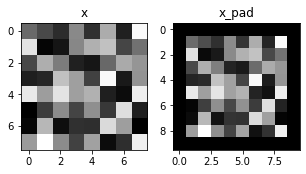

In [4]:
np.random.seed(1)

x = np.random.rand(3, 8, 8, 3)
x_pad = zero_pad(x, 1)

print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [5]:
# GRADED FUNCTION: pool_forward
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    設計一個前行網路的池化層
    參數定義如下:
    A_prev -- 輸入的numpy 陣列, 維度 (m, n_H_prev, n_W_prev, n_C_prev)
    hparameter 超參數 --  "f" and "stride" 所形成的python 字典
    mode -- 池化的模式: "max" or "average"
    
    返回:
        A -- 輸出的池化層, 維度為 (m, n_H, n_W, n_C) 的 numpy 陣列
        cache -- 可以應用在 backward pass pooling layer 資料, 包含 input and hparameter
    """

    # 檢索尺寸 from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
 
    # 檢索超參數 from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]

    # 定義輸出的dimensions
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # 初始化輸出的 matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ### 程式起始位置  ###
    for i in range(m): # 訓練樣本的for 迴圈
        for h in range(n_H): # 輸出樣本的for 迴圈, 針對vertical axis
            for w in range(n_W): #  輸出樣本的for 迴圈, 針對 horizontal axis
                for c in range (n_C): #  輸出樣本的for 迴圈, 針對channels

                     # 找出特徵圖的寬度跟高度四個點
                    vert_start = h * stride
                    vert_end = h * stride+ f
                    horiz_start = w * stride
                    horiz_end = w * stride + f

                    # 定義第i個訓練示例
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]

                    # 計算輸入data 的池化結果. 使用 if statment 去做分類
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

                        ### 程式結束  ###
    
    # 儲存輸入的特徵圖跟所設定的超參數, 可以用在 pool_backward()
    cache = (A_prev, hparameters)
    
    # 確認輸出的資料維度
    assert(A.shape == (m, n_H, n_W, n_C))
    return A, cache

In [10]:
np.random.seed(1)
A_prev = np.random.rand(3, 5, 5, 3)
hparameters = {'stride':2, 'f':2}
print(A_prev[0,:,:,0])

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A[0,:,:,0] =", A[0,:,:,0])
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A[0,:,:,0] =", A[0,:,:,0])

[[0.417022   0.30233257 0.18626021 0.53881673 0.20445225]
 [0.67046751 0.14038694 0.96826158 0.87638915 0.03905478]
 [0.09834683 0.53316528 0.68650093 0.75014431 0.28044399]
 [0.44789353 0.28777534 0.67883553 0.49157316 0.14672857]
 [0.10233443 0.41417927 0.66379465 0.58655504 0.13927635]]
mode = max
A[0,:,:,0] = [[0.67046751 0.96826158]
 [0.53316528 0.75014431]]

mode = average
A[0,:,:,0] = [[0.38255226 0.64243192]
 [0.34179525 0.65176348]]
